# Cyfrowe Przetwarzanie Sygnałów

**Laboratorium nr 12 Przwtwarzanie obrazów**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat 

Python/colab: Maciej Kowalik

##**1. Transformacja ortogonalna obrazu (2 pkt)**

Transformacje ortogonalne obrazów są bardzo podobne do transformacji sygnałów takich jak dźwięk,
mowa, sygnał radiowy czy innych jednowymiarowych sekwencji cyfrowych. Różnica polega na
dodaniu kolejnego wymiaru. W ćwiczeniu 1 spróbujmy wykonać takie transformacje dla
przykładowych obrazów.

1. Wczytaj obraz `im1.png`  (funkcja `matplotlib.pyplot.imread(...)`). Wyznacz jego DCT2 (funkcja `scipy.fftpack.dctn(...)`)
a następnie wyświetl (funkcja `matplotlib.pyplot.imshow(...)`). \\
Wyzeruj połowę znaczących współczynników widma obrazu (nie uwzględniaj w modyfikacji
współczynnika w lewym górnym rogu, który jest odpowiedzialny za DC). Następnie wykonaj
odwrotne DCT2 i porównaj obraz z oryginalnym.
1. Wczytaj obraz testowy `cameraman.tif`, wyświetl go , oblicz jego DCT2 (funkcja `scipy.fftpack.dctn(...)`).  
  a) Wyzeruj współczynniki widma obrazu związane z wysokimi (lub niskimi) częstotliwościami. \\
  b) Pozostaw tylko współczynniki widma przekraczające zadany próg (wartości bezwzględnej). \\
Zsyntezuj obraz po każdej z
powyższych operacji za pomocą funkcji `scipy.fftpack.dctn(...)`.
1. Sam wygeneruj obrazek 128x128 piksele, będący sumą kilku (od 3 do 5)
`im=im1+im2+im3+im4+im5` obrazów bazowych transformacji DCT2 (patrz rys. 22.15
w [TZ2005]). \\
Obrazy bazowe są iloczynami wektorowymi funkcji bazowych transformacji DCT. Możesz je
uzyskać odwrotną transformacją DCT. W tym cel, w zerowym wektorze
`IM1 = [[0 for x in range(128)] for y in range(128)]`, wstaw wartość „1” w miejscu funkcji bazowej którą chcesz
wygenerować np.: `IM1[1][9]=1;`, a następnie wykonaj odwrotne DCT: `im1=scipy.fftpack.idctn(IM1, norm='ortho')`. \\
Wyświetl obrazy bazowe i ich sumę. Następnie wykonaj analizę obrazu sumarycznego im
z użyciem funkcji `scipy.fftpack.dctn(...)` i wyświetl wynik jako obraz. Tylko 3-5 pikseli powinno
być zapalonych. Jeśli tak nie jest, to błędnie wygenerowałeś obraz. Potem pozostaw tylko
jeden z „zapalonych” współczynników DCT2, pozostałe wyzeruj. Wykonaj `scipy.fftpack.idctn(...)`.
Wyświetl obraz. Powinieneś zobaczyć jeden z obrazów bazowych, które zsumowałeś.
1. **Zagadka**: wczytaj obraz `im2.png`, wyznacz jego DCT2, wyświetl, dlaczego tak wygląda?

Zacznijmy od wczytania obrazu im1. Następnie usuwamy połowę współczynników znaczących w jego DCT i wyświetlamy jak się zmienił.

In [ ]:
import matplotlib.pyplot as plt
import gdown

gdown.download('https://drive.google.com/uc?id=1Xtg9YBDMvK4-5AvhtWj3vZcPgZ-1-mjJ', 'im1.png', quiet=True)
img = plt.imread("im1.png")
gdown.download('https://drive.google.com/uc?id=1BxDCm8WTzhHpSbX_uMi0mT47nmUdK-eT', 'cameraman.png', quiet=False)
img2 = plt.imread('cameraman.png')
gdown.download('https://drive.google.com/uc?id=1MCcAvKBSwHEvcuLfpnGha4vuRFc9NKYP', 'im2.png', quiet=True)
img4 = plt.imread("im2.png")


##**2. Filtracja obrazu (1.5 pkt)**
1. Używając napisanej funkcji `fwind1()` (wymaga ona również funkcji `convert()` oraz `win2d`) wygeneruj współczynniki wagowe (macierz) dwóch
przykładowych filtrów 2D obrazu (LP i HP) o wymiarach 32x32 oraz narysuj rozkład ich
wartości za pomocą funkcji `matplotlib.pyplot.imshow(...)`. Oblicz i narysuj wynik
transformacji kosinusowej tych wag (użyj funkcji `scipy.fftpack.dctn(...)`). Wczytaj obraz testowy
`lena512.png` i wykonaj splot z wagami wybranego filtra (funkcja
`scipy.signal.convolve2d`). Wyświetl obraz i jego widmo przed i po filtracji, użyj funkcji
`scipy.fftpack.dctn(...)`.
1. Przeanalizuj wpływ rozmiaru maski filtra z punktu 2.1 na obraz wynikowy. Powtórz to samo
dla filtru Gaussa, modyfikując również wartość parametru sigma w funkcji
`scipy.ndimage.gaussian_filter()`.

In [ ]:
import matplotlib.pyplot as plt
import gdown

gdown.download('https://drive.google.com/uc?id=1kP3dmXQkoNNPFOFiTk2XSxafyvpNOgc9', 'lena512.png', quiet=True)
lena = plt.imread("lena512.png")


##**3. Wyznaczanie konturów obiektów (1.5+0.25 pkt)**
1. Wczytaj kod `tab_det.m` oraz obraz testowy `car1.jpg` lub `car2.jpg`. Za pomocą
dwuwymiarowego filtru Gaussa (`scipy.ndimage.gaussian_filter()`) wykonaj filtrację
dolnoprzepustową co spowoduje rozmycie krawędzi/detali znajdujących się na obrazu.
Następnie wykonaj binaryzację, dobierz odpowiedni próg binaryzacji obrazu, taki aby usunąć z niego obszary o jasności innej niż piksele
reprezentujące tablicę rejestracyjną pojazdu. Piksel o wartości mniejszej lub większej od
progu otrzymuje wartość 0 a mieszące się w przedziale otrzymują wartość 1.
1. Na uzyskanym w ten sposób obrazie przetestuj działanie filtrów BP Sobela i Prewitta
służących do wykrywania krawędzi. Wykorzystaj funkcję:
`scipy.ndimage.sobel()` oraz `scipy.ndimage.prewitt`. Porównaj rezultaty do filtracji wykonanej za pomocą
funkcji: `filter(ImageFilter.FIND_EDGES)` z biblioteki `PIL`.
1. **Opcjonalnie** (+1 pkt): Spróbuj, za pomocą odpowiedniej kombinacji kolejności i liczby
wykonywanych operacji morfologicznych (erozji, dylatacji, wypełnienia - znajdziesz je w bibliotece `skimage.morphology`), usunąć z obrazu elementy mniejsze niż określona liczba pikseli - funkcja
`remove_small_holes()` i doprowadzić do pozostawienia na obrazie wynikowym tylko konturów
tablicy rejestracyjnej.

In [ ]:
import matplotlib.pyplot as plt
import gdown

gdown.download('https://drive.google.com/uc?id=1fBwNP7j5DRaG7sXzUpOxEU2Ca7BUfFQ0', 'car1.jpg', quiet=True)
I = Image.open('car1.jpg').convert('L')

plt.figure(figsize=(15, 15))
plt.title("obraz car1")
plt.imshow(I , cmap='gray')

##**4. Kompresja obrazów: idziemy w stronę JPEG-a (+1.5 pkt)**
Schemat blokowy kodera i dekodera obrazów standardu JPEG przedstawiono między innymi na
rysunku 22.38 [TZ]. Poniżej wypunktowano najważniejsze etapy kompresji. Nazwy funkcji
i zmiennych odnoszą się do poniższego kodu implementującego ten algorytm.
1. Podział obrazka na bolki 8x8 pikseli – zmienna blok.
1. Transformacja DCT – DCT8x8(...).
1. Kwantyzator (dzielenie wartości przez q i zaokrąglanie)– kwant(...).
1. Koder entropijny \\
  a) Rozwijanie dwuwymiarowego bloku 8x8 pikseli do jednowymiarowego wektora według
kolejności zygzak – `ZigZag(...)`. \\
  b) Konstruowanie par liczb – `RLE(...)`. \\
  c) Kodowanie współczynników DC do bitów – `VLCDC(...)`.
  d) Kodowanie współczynników AC w postaci par liczb do bitów – `VLC(...)`.
  e) Kodowanie entropijne algorytmem Huffmana, współczynników DC i AC. Ze względu na
różną statystykę tych liczb, stosowane są dwa kodery – jeden do DC drugi do AC.
1. formowanie strumienia bitów – zmienna `bits`.

Na szczególną uwagę zasługuje algorytm tworzący pary liczb. Po kwantyzacji współczynników
transformaty DCT okazuje się (sprawdź!), że niezerowe liczby w wynikowej macierzy 8x8 znajdują
się w jej lewym górnym fragmencie. Ten obszar macierzy reprezentuje niskie częstotliwości obrazu w
kierunku poziomym i pionowym. Po rozwinięciu macierzy za pomocą algorytmu zygzak
otrzymujemy przykładowe ciągi liczb, odpowiadające dwóm blokom analizowanego obrazka: \\
`blok 1: 520,50,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-12,0,...0` \\
`blok 2: 510,30,47,0,0,0,0,0,0,12,0,...,0`.

Pary liczb zapisujemy w postaci `(X,Y)`, gdzie `X` oznacza liczbę zer poprzedzającą wartość `Y`.
Powyższe ciągi liczb można więc zapisać następująco: \\
`blok 1: DC=520, AC=(0,50), (0,20), (15,0), (6,-12), (0,0)` \\
`blok 2: DC=510, AC=(0,30), (0,47), (6,12), (0,0)`

Jak widać zakodowanie pojedynczego niezerowego współczynnika jest nieefektywne, natomiast
algorytm pozwala bardzo efektywnie zapisać długie sekwencje zer. Wartości DC koduje się oddzielnie
algorytmem DPCM.
1. Zaimplementuj funkcję DCT. Możesz skorzystać z funkcji `scipy.fftpack.dctn(...)`. Opcjonalnie zaimplementuj
własną transformatę DCT.
1. Zaimplementuj funkcję kwantyzacji według zależności: *y=⌊x /q+0.5⌋* gdzie q to
współczynnik kwantyzacji. Im większa wartość q tym gorsza jakość kompresowanego obrazka. Opcjonalnie zaimplementuj tablicę kwantyzacji według zależności (22.63) [TZ].
1. Zaimplementuj funkcję rozwijania macierzy 8x8 według kolejności zygzak. Zrób to sprytnie!.
1. Opcjonalnie: dodaj algorytm kodowania entropijnego za pomocą kodu Huffmana.

Dekoder zakodowanego obrazka działa analogicznie do kodera tylko w odwrotnej kolejności.
Poszczególne etapy mają swoje komplementarne funkcje, np. w dekoderze transformata DCT zostaje
zastąpiona odwrotną transformatą DCT czyli IDCT.

Po uzupełnieniu kodu, wykonaj konwersję obrazków `paski.png`, `lena.png`, `goldhill.png` oraz
`barbara.png` dla różnych współczynników kwantyzacji. Pierwszy obrazek jest syntetyczny, składa
się z różnych wzorców. Zaprezentuj i przeanalizuj współczynniki transformacji DCT przed oraz po
kwantyzacji dla wybranych wzorców. Poniżej przedstawiono kod wywołania pojedynczej sekwencji
kodowana i dekodowania.

```
img = np.asarray(Image.open("lena512.png"))
q = 80
bits = jpegCode( img, q )
out = jpegDecode( bits )

matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(img , cmap='gray')

matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(out , cmap='gray')

```

Wyznacz jakość kompresji za pomocą współczynnika PSNR (ang. Peak signal-to-noise ratio)
opisanego zależnością:

\begin{align}
PSNR&=10log_{10} \left( \frac{MAX_I^2}{MSE} \right), MAX_I =2^b, MSE=\frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} (img(x,y)-out(x,y))^2
\end{align}  

gdzie $b$ to liczba bitów na których kodowana jest jasność pojedynczego punktu natomiast $M$ i $N$ to
odpowiednio szerokość i wysokość obrazka.

Wyznacz i narysuj wykres wartości PSNR w funkcji parametru $q$. Dobierz tak wartości $q$ aby
przetestować algorytm w zakresie kompresji od 0.125 do 2 bpp (ang. bit per pixel) bitu na punkt
(średnio). Na jednym rysunku narysuj krzywe dla obrazka `lena256.png`, `lena512.png` i
`barbara256.png` (dane do wykresów zapisz, tak aby podczas prezentacji nie wykonywać obliczeń). \\
**(0.5 pkt)**: do wykresu dodaj wyniki kodowania pełnym algorytmem JPEG. Użyj implementacji
znajdującej się w Matlabie.

**(0.5 pkt)**: zmodyfikuj algorytm tak aby działał na obrazach kolorowych. W tym celu przejdź z
przestrzeni RGB do YUV i wykonaj kodowanie na każdej składowej oddzielnie. Dodatkowo wykonaj
wszystkie opcjonalne punkty z implementacji opisanej punktami od 1 do 4.

**(0.5 pkt)**: zmodyfikuj algorytm kwantyzacji według następujących schematów:
* zone-coding: pozostaw tylko z współczynników w okolicy DC, tj. w lewym górnym rogu,
* treshold-coding: pozostaw tylko współczynniki o wartość bezwzględnej większej niż $t$.

Przeanalizuj wyniki i porównaj do pierwotnego algorytmu.



In [ ]:
# wczytanie wszystkich obrazów

gdown.download('https://drive.google.com/uc?id=1kP3dmXQkoNNPFOFiTk2XSxafyvpNOgc9', 'lena256.png', quiet=True)
lena256 = np.asarray(Image.open("lena256.png"))
gdown.download('https://drive.google.com/uc?id=1v39EBCmoAz7AdwAe0T023pLqiLmyHbDF', 'lena512.png', quiet=True)
lena512 = np.asarray(Image.open("lena512.png"))
gdown.download('https://drive.google.com/uc?id=1oytoHXUKwly10Kl319HLOwL4mQDxAvRx', 'barbara512.png', quiet=True)
barbara = np.asarray(Image.open("barbara512.png"))
gdown.download('https://drive.google.com/uc?id=1TSbHRfqvv_h0yJPp62owvTP-FzSIdHl-', 'goldhill512.png', quiet=True)
goldhill = np.asarray(Image.open("goldhill512.png"))
gdown.download('https://drive.google.com/uc?id=1ML5yZyYfAbYatRrWdYBgYFLLhvzmCVeK', 'paski.png', quiet=True)
paski = np.asarray(Image.open("paski.png").convert('L'))
gdown.download('https://drive.google.com/uc?id=1HGN4aD3t4CrUnCcF6l_r-zHAbVxT_geO', 'car2.jpg', quiet=True)
car = np.asarray(Image.open("car2.jpg"))

##**5. (opcjonalne) Dopasowanie obrazów w oparciu o informację wzajemną (+0.5 pkt)**
Jako przykład zastosowania dopasowywania do siebie obrazów 2D w oparciu o transformację
afiniczną i informację wzajemną posłuży algorytm „prostowania” tablicy rejestracyjnej samochodu
wyodrębnionej z obrazów rejestrowanych przez kamery monitorującej ruch. Otrzymane za pomocą
tego algorytmu obrazy mogą być następnie wykorzystywane przez inne algorytmy służące do
automatycznego odczytu numerów tablic rejestracyjnych.

Pierwszym krokiem (1 pkt) jest wykonie prostego algorytmu automatycznej detekcji tablicy
rejestracyjnej na zdjęciu. Zakładamy że tablica rejestracyjna będzie miała względny rozmiar
mieszczący się w pewnym przedziale - tablice są znormalizowane, kamera robi zdjęcia zawsze pod
określonym kątem i z określonej odległości.

**Jeśli nie będziesz mógł uzyskać zadowalających rezultatów za pomocą swojego
algorytmu, użyj ramki z tablicą wyciętą „ręcznie”** `tab_dop.jpg` **i przejdź do punktu 4.**

Algorytm detekcji tablicy rejestracyjnej powinien składać się z następujących kroków (szkielet
programu takiej ekstrakcji znajduję się w poniższym kodzie):
1. Wyodrębnienie maski tablicy rejestracyjnej w oparciu o wartości pikseli składających się na
jej jaśniejszą część (zakładamy że zdjęcia pochodzą z jednej kamery, na obrazach z której
piksele reprezentujące tablicę charakteryzują się zawsze jasnością z określonego przedziału
wartości). Oprócz tablicy na obrazie pozostaną inne elementy o jasności z tego samego
przedziału (Rys 5.1b)

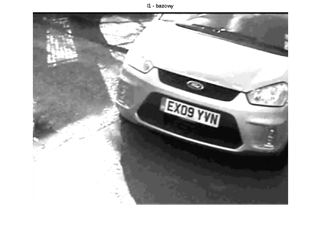 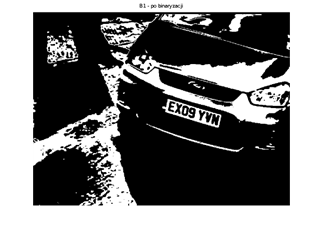
1. Usunięcie pozostałych i niepożądanych elementów obrazu (ich masek). W tym celu możesz
skorzystać z kombinacji operacji morfologicznych (erozji, dylatacji, wypełnienia, usuwania
małych elementów) lub opierając się na cechach elementów obrazu binarnego,
ekstrahowanych za pomocą funkcji `skimage.measure.label()` i `numpy.unique()`. Efekt
etykietowania obrazu 5.1b funkcją `skimage.measure.label()` przedstawiono na rysunku 5.2.

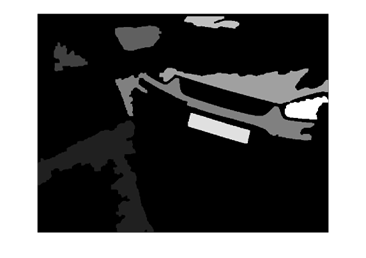
1. Funkcja `skimage.measure.regionprops()` wyznacza wartość określonej cechy (np. obwód, centroid)
poszczególnych elementów obrazu (wyodrębnionych funkcją `skimage.measure.label()`. Zapisywane są
one następnie do wektora cech `wece`.
```
% wyznaczanie cechy (OKREŚLIĆ jakiej) elementu obrazu z i - tą etykietą
BWprops = skimage.measure.label(B2)
% uzupełnienie wektora cech o wartość cechy elementu obrazu z i - tą etykietą
wece.append(Bwprops[0].%cecha%)
```
Spróbuj określić jaka cecha (lub jakie cechy) najlepiej opisują maskę tablicy rejestracyjnej
a następnie sformułuj kryterium określania który z elementów obrazu po etykietowaniu
(Rys. 5.3) odpowiada tablicy rejestracyjnej. W efekcie powinien zostać wyekstrahowany obraz
maski tablicy rejestracyjnej (Rys. 5.3).
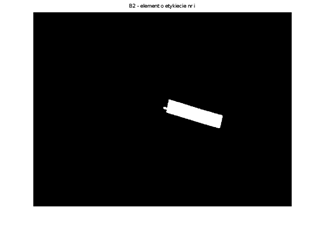
1. Wymnożenie maski tablicy rejestracyjnej z oryginalnym obrazem tak, aby otrzymać obraz
zbliżony do przedstawionego na rysunku 5.4. Pikselom tła na którym znajduje się ramka
przypisz wartość 255.

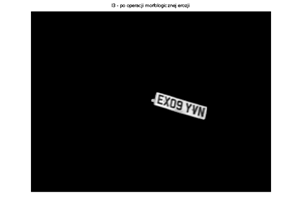 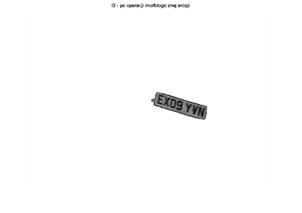
1. Wycięcie ramki w obrębie której będzie mieściła się tablica, np. poprzez: wyszukanie spośród
indeksów niezerowych pikseli maski tablicy (Rys. 5.3) tych o skrajnych wartościach
i odpowiednie zwiększenie (lub zmniejszenie) ich wartości. Efektem końcowym powinna być
ramka z obrazem tablicy (nie maską binarną) zbliżona do przedstawionej na Rys. 5.5.
Spróbuj również usunąć litery z tablicy (przypisz odpowiadającym im pikselom wartość
piksela z jasnej części tablicy).

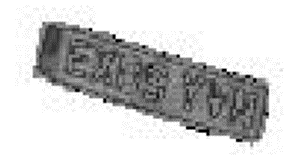

Sprawdź jakie rezultaty daje algorytm dla zdjęcia `car2.jpg` (punkt 3).

**Możliwe jest również zaimplementowanie innego, własnego sposobu detekcji ramki, jeśli
tylko daje wymagane rezultaty.**

Następnie dopasuj otrzymaną ramkę z tablicą do obrazu tablicy wzorcowej `tab_wz.jpg` za pomocą
kodu `reg_AT_MI.m` (implementującego algorytm dopasowania obrazu w oparciu o informację
wzajemną). Przetestuj wpływ liczby iteracji i kroku zmiany parametrów na jakość/efekty
dopasowania. Możesz również dokonać wstępnego przeskalowania (funkcja `imresize(...)`) lub
filtracji obrazu dopasowywanego.

In [ ]:
import matplotlib.pyplot as plt
import gdown

gdown.download('https://drive.google.com/uc?id=1glXr1tC_jHCTNbnNsXtuTkPFuvCS2CSq', 'test.bmp', quiet=True)
B1 = plt.imread("test.bmp")

gdown.download('https://drive.google.com/uc?id=1fBwNP7j5DRaG7sXzUpOxEU2Ca7BUfFQ0', 'car1.jpg', quiet=True)
I = Image.open('car1.jpg').convert('L')

L = measure.label(B1)

plt.figure(figsize=(15, 15))
plt.title("tablica wczytana z zadania 3.")
plt.imshow(L, cmap='gray')